<a href="https://colab.research.google.com/github/IndioP/Projeto-AM/blob/main/Avila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 de Aprendizado de Máquina
## Grupo
- João Victor de Lima Peixoto
- José Douglas Pontes Silva
- Marcos Heitor Carvalho de Oliveira
- Mikael Vidal da Silva

# Introdução
O projeto da cadeira de aprendizado de máquina visa aplicar as diferentes técnicas aprendidas na disciplina para fazer uma análise exploratoria sobre a `precisão (precision)`, `cobertura (recall)` e `f1-score` presentes no uso de cada algoritmo estudado em um `dataset` do mundo real.

Os algoritmos aprendidos na cadeira e testados no projeto foram:
- Árvores de Decisões
- Bayesiano Ingenuo
- Regressão Logistica
- K Vizinhos

, onde cada algoritmo apresenta parâmetros e logicas próprias que serão discutidas na fundamentação teórica deste relatório.

O conjunto de dados testado no projeto foi o `Avila Data Set`. Em resumo, esse conjunto de dados foi extraido através de 800 imagens da Biblia de Avila, uma cópia em latim da Biblia produzida no século XII em um local entre a Itália e a Espanha. No capítulo "Conjunto de dados", faremos uma descrição mais ampla de como esse dataset é dividido e também das suas features.

Por fim, mostraremos os resultados e conclusões obtidas dos nossos experimentos.

# Objetivos

O objetivo geral do projeto é explorar os algoritmos aprendidos na cadeira de Aprendizagem de Máquina. Essa objetivo geral engloba os seguintes objetivos especificos:

- I. Explorar o conjunto de dados de `Avila` e verificar as features relevantes para cada método utilizado.
- II. Realizar o treinamento e classificação de cada um dos algoritmos aprendidos utilizando o `Avila Data Set`.
- III. Realizar uma analise exploratoria de mudanças dps hiper-parametros de cada algoritmo para buscar valores melhores de `precision`, `recall` e `f1-score`.

# Fundamentação Teórica

Nesse cápitulo abordaremos alguns dos fundamentos básicos para que o leitor possa entender o projeto. Inicialmente falaremos sobre as métricas usadas para avaliar cada modelo e em seguida falaremos sobre cada modelo em si.

## Métricas

Em geral, quando estamos trabalhando com modelos de classificação, precisamos de algumas métricas para avaliar se a performance de um modelo é melhor do que a de outro modelo ao realizar uma classificação. Nesse contexto, `precision`, `recall` e `f1-score` servem como essas métricas para prover o quão bem um modelo é capaz de prever corretamente a classificação de uma instância com sua classe real. Além disso, essas métricas nos ajudam a comparar diferentes modelos ou parâmetros usados em algum classificador para otimizar sua performance. 

### Precision

A métrica de precisão (ou `precision`) mede a proporção de predições verdadeiras sobre todas as predições positivas feitas pelo modelo. A precisão é calculada como na fórmula abaixo:

<img src="http://www.sciweavers.org/tex2img.php?eq=%20%5Cfrac%7BTP%7D%7BTP%20%2B%20FP%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" \frac{TP}{TP + FP} " width="67" height="43" />

, onde `TP` é número de predições positivas enquando `FP` é o número de predições falso-positivas. Uma precisão alta indica que o modelo é bom em indentificar instâncias e tem uma taxa baixa de falso-positivos.

### Recall 

A métrica de cobertura (ou `recall`) mede a proporção de precições verdadeiras sobre todas as instâncias verdadeiramente positivas nos dados. A cobertura é calculada como na fórmula abaixo:

<img src="http://www.sciweavers.org/tex2img.php?eq=%20%5Cfrac%7BTP%7D%7BTP%20%2B%20FN%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" \frac{TP}{TP + FN} " width="69" height="43" />

, onde `TP` é número de predições positivas enquando `FN` é o número de predições falso-negativas. Uma cobertura alta indica que o modelo é bom em indentificar todas as intâncias positivas e tem uma taxa baixa de falso-negativos.

### F1-Score

A métrica `f1-score` combina tanto a precisão como a cobertura em uma unica métrica. O `f1-score` pode ser calculada da seguinte forma:

<img src="http://www.sciweavers.org/tex2img.php?eq=%202%20%2A%20%5Cfrac%7Bprecision%20%2A%20recall%7D%7Bprecision%20%2B%20recall%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0" align="center" border="0" alt=" 2 * \frac{precision * recall}{precision + recall} " width="187" height="47" />

Essa métrica serve para avaliar a performance de um modelo onde ambas precisão e cobertura são desejadas.

## Algoritmos

Dentro do assunto de aprendizado de máquina, os algoritmos que nós aprendemos servem como modelos de classificação. Esses modelos de classificação servem para prever uma classe categorica sobre uma instância de entrada levando em consideração suas `features`, ou parâmetros de entrada.

No caso do projeto, faremos um aprendizado supervisionado, onde usaremos um conjunto de dados já rotulados com a classe correta na entrada para treinar os modelos de classifação. Com isso, os modelos serão capazes de predizer a classe de dados ainda não vistos. 

Existem muitos tipos de modelos de classificação na literatura. Entraremos agora em detalhe sobre os modelos de classificação usados no projeto.

### Decision Tree Classifier

### Naive Bayes

### Logistic Regression

### K-Neighbors

# Conjunto de Dados

A analisa paleografica do manuscrito indicou a presença de 12 escrivãos responsáveis pela copia. A quantidade de páginas escritas por cada escrivão não é igual.

Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

Os dados do projeto AVILA são referentes as informações extraidas das imagens das páginas copiadas da biblía de AVILA.
As CLASSES de [A, B, C, D, E, F, G, H, I, W, X, Y] fazem referência a qual copiador foi responsavel por aquele trecho/página
Então, a ideia é conseguir criar um bom classificador, que consiga por meio das informações extraidas dos trechos das páginas [F1,F2,F3,F4,F5,F6,F6,F7,F8,F9,F10] consiga-se identificar quem foi o copiador responsavél


# Metodologia

A metodologia utilizada neste projeto se concentra em 3 formas de desenvolvimento para cada método.
- 1. Realizar o treinamento e classificação utilizando os valores default dos respectivos métodos
- 2. Realizar uma analise exploratoria de mudanças de hiper-parametros para buscar valores melhores de precision | recall | f1-score
- 3. Utilizar do OPTUNA, ferramenta que automatiza o processo de testagem de hiper-parametros para um determinado modelo. 

# Resultados


In [ ]:
!git clone https://github.com/IndioP/Projeto-AM

fatal: destination path 'Projeto-AM' already exists and is not an empty directory.


## Import's iniciais do projeto

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
df = pd.read_csv("Projeto-AM/avila-tr.txt",names = names)
df_ts = pd.read_csv("Projeto-AM/avila-ts.txt",names=names)
X_test = df_ts.drop("Class",axis=1)
y_test = df_ts["Class"]

In [ ]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


### Separando o conjunto de treinamento em TREINO 80% | VALIDAÇÃO 20%

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(df.drop("Class",axis=1), df["Class"],test_size=0.2,random_state=2023)

In [ ]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((8344, 10), (8344,), (2086, 10), (2086,))

## Primeira análise dos modelos com valores default's dos métodos utilizados pelo Scikit Learn
- Decisition Tree
- Gaussian NB
- LOgistic Regression
- KNN

In [ ]:
models = [DecisionTreeClassifier(), GaussianNB(), Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))]), KNeighborsClassifier()]
models_names = ["DecisionTreeClassifier", "GaussianNB", "LogisticRegression", "KNeighborsClassifier"]

In [ ]:
for model,name in zip(models,models_names):
  print(f'\nModel: ',name)
  clf = model
  clf.fit(X_train,y_train)
  
  print("Accuracy: ",clf.score(X_valid,y_valid))
  
  pred = clf.predict(X_valid)
  print("Precision: ",precision_score(pred,y_valid,average="weighted"))
  print("Recall: ",recall_score(pred,y_valid,average="weighted"))
  print("F1-score: ",f1_score(pred,y_valid,average="weighted"))
  print("-"*100)


Model:  DecisionTreeClassifier
Accuracy:  0.9741131351869607
Precision:  0.9745985939931646
Recall:  0.9741131351869607
F1-score:  0.9742471186418911
----------------------------------------------------------------------------------------------------

Model:  GaussianNB
Accuracy:  0.28044103547459254
Precision:  0.4869461008434287
Recall:  0.28044103547459254
F1-score:  0.31269471946758487
----------------------------------------------------------------------------------------------------

Model:  LogisticRegression
Accuracy:  0.5522531160115053
Precision:  0.8055085318695356
Recall:  0.5522531160115053
F1-score:  0.631349791534737
----------------------------------------------------------------------------------------------------

Model:  KNeighborsClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7157238734419943
Precision:  0.7428505624498204
Recall:  0.7157238734419943
F1-score:  0.7225385508602775
----------------------------------------------------------------------------------------------------


In [ ]:
def check_test(clf,X_test,y_test):
  pred = clf.predict(X_test)
  print("Precision: ",precision_score(pred,y_test,average="weighted"))
  print("Recall: ",recall_score(pred,y_test,average="weighted"))
  print("F1-score: ",f1_score(pred,y_test,average="weighted"))

check_test(clf,X_test,y_test)

Precision:  0.7552854027850691
Recall:  0.7311487975471879
F1-score:  0.7369839317135863


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.3 MB/s eta 0:00:00


# DecisionTreeClassifier parameters

In [ ]:
criterion = "gini" #What is the criterion used for the split
#There is an scientific paper comparing gini and entropy and they diverge in only 2% of the cases, but entropy is a little slower because of logarithm

splitter = "best" #The strategy used to choose the split at each node
#If the model is suffering from overfitting we can change it to random, to avoid this fate

max_depth = None #can be None to go forever till purity beeing achieved

min_samples_split = 2 #if int, it is the minimal number to make a split
                      #if float, it is the min_samples_split * n_samples

min_samples_leaf = 1 #int, float

#min_weight_fraction_leaf = 

max_features = None #there are few features, so I think

In [ ]:
from sklearn.utils.extmath import weighted_mode
import optuna



def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split",2,50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,30)
    
    clf = DecisionTreeClassifier(
                                #criterion=criterion,
                                #splitter=splitter,
                                min_samples_split=min_samples_split,
                                #max_depth=max_depth, 
                                #min_samples_leaf=min_samples_leaf, 
                                max_features=max_features
                                )
    clf.fit(X_train,y_train)
    pred = clf.predict(X_valid)
    return f1_score(pred,y_valid,average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-03-05 14:42:31,615] A new study created in memory with name: no-name-a759c063-2c38-436e-bee5-47d53eecddad
[I 2023-03-05 14:42:31,707] Trial 0 finished with value: 0.8841244291729367 and parameters: {'min_samples_split': 39, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8841244291729367.
[I 2023-03-05 14:42:31,803] Trial 1 finished with value: 0.9170424581061433 and parameters: {'min_samples_split': 25, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.9170424581061433.
[I 2023-03-05 14:42:31,900] Trial 2 finished with value: 0.9471279855591596 and parameters: {'min_samples_split': 15, 'min_samples_leaf': 22}. Best is trial 2 with value: 0.9471279855591596.
[I 2023-03-05 14:42:32,020] Trial 3 finished with value: 0.9503280310832801 and parameters: {'min_samples_split': 13, 'min_samples_leaf': 26}. Best is trial 3 with value: 0.9503280310832801.
[I 2023-03-05 14:42:32,180] Trial 4 finished with value: 0.8536972179229775 and parameters: {'min_samples_split': 48, 'min

{'min_samples_split': 2, 'min_samples_leaf': 1}


# Naive Bayes

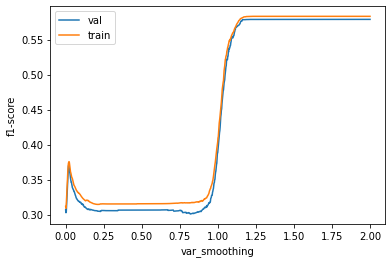

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

results_val = []
results_train = []
x = np.linspace(1e-3,2,1000) #unico parametro que parece ser relevante????
for i in x:
  clf = GaussianNB(var_smoothing = i)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

plt.plot(x,results_val,label='val')
plt.plot(x,results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()

In [ ]:
clf = GaussianNB(var_smoothing = 1.225)
clf.fit(X_train,y_train)
print("acuracia =",clf.score(X_valid,y_valid))

pred = clf.predict(X_valid)
print("f1",f1_score(pred,y_valid,average="weighted"))
print("recall",recall_score(pred,y_valid,average="weighted"))
print("precision",precision_score(pred,y_valid,average="weighted"))
print("-"*100)

acuracia = 0.4074784276126558
f1 0.5790190735694823
recall 0.4074784276126558
precision 1.0
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
check_test(clf,X_test,y_test)

f1 0.5821701553337219
recall 0.410846028552266
precision 0.9997128540868042


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusão:
**Podemos verificar no grafico acima, que o var_smoothing acima de 1.225 chega em um platô com o melhor resultado possivel de f1_score**



# LogisticRegression
penalty = {l1, l2, elasticnet, None}

dual= {True or False} Prefer dual=False when n_samples > n_features.

tol = 1e-4

C = 1.0

fit_intercept = True

intercept_scaling = 1

class_weight = **dict** or ‘balanced’, default=None

solver = {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 

random_state = None **Used when solver == ‘sag’, ‘saga’**



In [ ]:
def make_df_metrics(methods,results_train,results_val):
  return pd.concat([pd.DataFrame({"x":methods,'y':results_train,'label':['train']*len(results_train)}),pd.DataFrame({"x":methods,'y':results_val,'label':['val']*len(results_val)})])


### check penalty

In [ ]:

results_val = []
results_train = []
penalties = ['l1','l2',None]
for penalty in penalties:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty=penalty,solver='saga',max_iter=10000))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

for l1_ratio in np.linspace(0.1,1.0,10):
  penalties.append(f"elasticnet_{l1_ratio}")
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=l1_ratio,max_iter=10000))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(penalties,results_train,results_val)

In [ ]:
sns.barplot(data=df_metrics,y='x',x='y',hue='label')
plt.ylabel("penalties")
plt.xlabel("f1_score")
plt.xlim(0.58, 0.66)

In [ ]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

### check solver

In [ ]:
results_val = []
results_train = []
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
for solver in solvers:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(solver = solver,max_iter=10000,random_state=42))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(solvers,results_train,results_val)

In [ ]:
sns.barplot(data=df_metrics,y='x',x='y',hue='label')
plt.ylabel("solver")
plt.xlabel("f1_score")
plt.xlim(0.62, 0.66)

In [ ]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

In [ ]:
def plot_line(x,results_val,results_train,xlabel):
  plt.title("testing for "+xlabel)
  plt.plot(Cs,results_val,label='val')
  plt.plot(Cs,results_train,label='train')
  plt.ylabel("f1-score")
  plt.xlabel(xlabel)
  plt.legend()

### check C

In [ ]:
results_val = []
results_train = []
Cs = np.linspace(0.05,7.5,200)
for C in Cs:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000,C=C))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

df_metrics = make_df_metrics(Cs,results_train,results_val)

plot_line(Cs,results_val,results_train,"C")


In [ ]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

### Check tol

In [ ]:
results_val = []
results_train = []
tols = np.linspace(0.00001,1.0,200)
for tol in tols:
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000,tol=tol))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
    
df_metrics = make_df_metrics(tols,results_train,results_val)

plot_line(tols,results_val,results_train,"tol")

In [ ]:
df_metrics.sort_values(by='y',ascending=False).groupby(by='label').head(2)

In [ ]:
clf =  Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty='l2',solver='newton-cholesky',C=0.5,tol=5.5,max_iter=10000))])
clf.fit(X_train,y_train)
pred = clf.predict(X_valid)
print("f1_val",f1_score(pred,y_valid,average="weighted"))
pred = clf.predict(X_train)
print("f1_train",f1_score(pred,y_train,average="weighted"))


In [ ]:
check_test(clf,X_test,y_test)